In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.precision', 2)
pd.set_option('display.max.columns', 40)
import seaborn as sns

In [88]:
train = pd.read_csv("inputs/Train.csv")
test = pd.read_csv("inputs/Test.csv")

In [3]:
train

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression


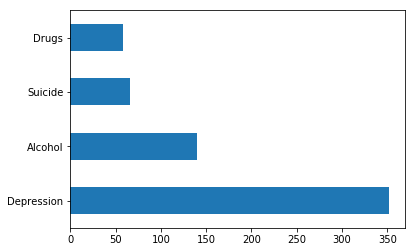

In [10]:
train.label.value_counts().plot(kind='barh');

In [40]:
test

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?
...,...,...
304,Z9A6ACLK,Yes
305,ZDUOIGKN,My girlfriend dumped me
306,ZHQ60CCH,How can I go back to being my old self?
307,ZVIJMA4O,Is it true bhang is medicinal?


In [44]:
test[test.text.str.match("Yes")]

,ID,text
304,Z9A6ACLK,Yes


In [64]:
train_len = train.text.apply(lambda x: len(x.split(' ')))
train_len.agg(['min', 'mean', 'max'])

min      1.00
mean     7.83
max     36.00
Name: text, dtype: float64

In [58]:
test.text.apply(lambda x: len(x.split(' '))).agg(['min', 'mean', 'max'])

min      1.0
mean     8.1
max     31.0
Name: text, dtype: float64

In [61]:
train[train.text.apply(lambda x: len(x.split(' '))) == train.text.apply(lambda x: len(x.split(' '))).min()].text.values

array(['Challenging', 'Dissappointed', 'Sad,lonely'], dtype=object)

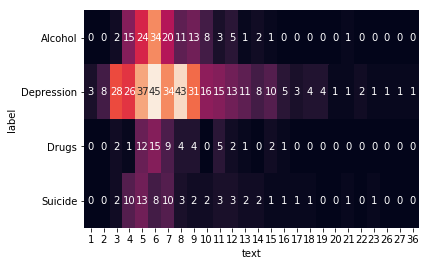

In [73]:
sns.heatmap(pd.crosstab(train.label, train_len), annot=True, cbar=False);

In [21]:
train[:3]

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression


In [75]:
train = pd.concat([train.text, pd.get_dummies(train['label']).reindex(columns=["Depression", "Alcohol", "Suicide", "Drugs"])], axis=1)
train[:3]

,text,Depression,Alcohol,Suicide,Drugs
0,I feel that it was better I dieAm happy,1,0,0,0
1,Why do I get hallucinations?,0,0,0,1
2,I am stresseed due to lack of financial suppor...,1,0,0,0
